# Importing data with pandas and plotting it using matplotlib (a clast count example)

## Import function libraries

In order to use the functions associated with matplotlib and pandas, we need to import them which is done in the code cell below. The convention is to import them using shortened code names (e.g. pd for pandas; plt for matplotlib.pyplot).

```pandas``` is a widely used data analysis library that has tools for importing and manipulating data. The central component of pandas is the DataFrame object which is an indexed tabular data structure.

```matplotlib``` is a widely used library that enables data visualization (it makes plots).

```sns``` is a Python data visualization library built on top of matplotlib that provides shortcuts to make nice looking and informative statistical graphics from pandas DataFrames. https://seaborn.pydata.org/examples/index.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import numpy as np
from scipy.stats import ks_2samp

## Import our data

Our clast data is currently within a Google Sheet. We can specify the sheet_id and read in the data directly from Google Sheets. Note that the sheet name can not have any spaces in it (as urls can not have spaces; although spaces can be specified with %20). The code cell below creates a url that points to our Google sheet.

In [2]:
sheet_id = '1AzWK9z--mBC0JONk-sZ0wTZwc83oNqbGtiug3i1qsG0'
sheet_name = 'protrusions'
protrusion_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
print(protrusion_url)

https://docs.google.com/spreadsheets/d/1AzWK9z--mBC0JONk-sZ0wTZwc83oNqbGtiug3i1qsG0/gviz/tq?tqx=out:csv&sheet=protrusions


Now that the url is specified, we can read the data and import it as a pandas dataframe with the code ```pd.read_csv(url)```. We will create a dataframe with the name diorite_protrusions. The Jupyter notebook will show us the header (first 5 rows) and the footer (last 5 rows) of the dataframe>

In [3]:
diorite_protrusions = pd.read_csv(protrusion_url)
diorite_protrusions

,team name,moraine,protrusion depth (cm)
0,Leah,older,1.1
1,Leah,older,3.0
2,Leah,older,2.0
3,Leah,older,5.0
4,Leah,younger,0.2
...,...,...,...
210,Fault,younger,NaN
211,Fault,younger,NaN
212,Fault,younger,NaN
213,Fault,younger,NaN


## Summarize our data

Each pandas dataframe column can be referred to by using the syntax:

```data_frame_name['column_name']```

In [4]:
 diorite_protrusions['protrusion depth (cm)']

0      1.1
1      3.0
2      2.0
3      5.0
4      0.2
      ... 
210    NaN
211    NaN
212    NaN
213    NaN
214    NaN
Name: protrusion depth (cm), Length: 215, dtype: float64

In addition, pandas will summarize the data if we apply the function ```.describe()``` to our column of data.

Let's get the summary statistics associated with the data in the ```'protrusion depth (cm)'``` column. We will see the count, the mean, and other statistics such as the 25, 50, and 75 percentiles.

In [5]:
 diorite_protrusions['protrusion depth (cm)'].describe(include='all')

count    174.000000
mean       3.213793
std        2.934770
min        0.000000
25%        1.000000
50%        2.100000
75%        4.650000
max       14.000000
Name: protrusion depth (cm), dtype: float64

We want to be able make a comparison between the diorite protrusion length in the younger moraine vs. the older moraine. Pandas provides ways to filter data. There is a column called ```moraine```. We can say that we just want to see the rows of the dataframe where 'younger' is the value in the  ```moraine``` column and call that ```diorite_young``` and vice versa for ```diorite_old```.

In [6]:
diorite_young = diorite_protrusions[diorite_protrusions['moraine'] == 'younger']
diorite_old = diorite_protrusions[diorite_protrusions['moraine'] == 'older']

We can now calculate the summary statistics for young and then old

In [7]:
diorite_young['protrusion depth (cm)'].describe(include='all')

count    90.000000
mean      1.521111
std       1.355015
min       0.000000
25%       0.700000
50%       1.000000
75%       1.800000
max       7.000000
Name: protrusion depth (cm), dtype: float64

In [8]:
diorite_old['protrusion depth (cm)'].describe(include='all')

count    84.000000
mean      5.027381
std       3.089951
min       0.300000
25%       2.500000
50%       4.450000
75%       6.475000
max      14.000000
Name: protrusion depth (cm), dtype: float64

## Visualize our data

We can use seaborn to visualize our data. 

### Swarm plot

For example, we can draw a scatterplot where one variable is categorical called a swarmplot to show all of our measurements. We can define the x values on the plot to be the protrusion depth putting ```x="protrusion depth (cm)"```, can make y be categorized by the moraine categories with ```y="moraine"```, and need to specify that the dataframe is diorite_protrusions with ```data=diorite_protrusions```.

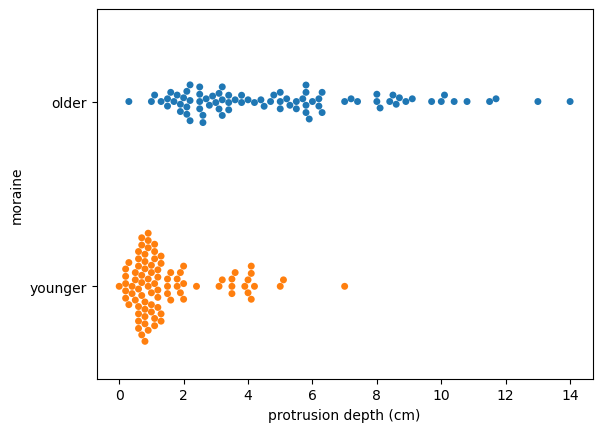

In [9]:
sns.swarmplot(x="protrusion depth (cm)", y="moraine", data=diorite_protrusions)
plt.show()

### Box and whisker plot

We can combine the swarmplot with a box and whisker plot which that shows the 25 percentile, 50 percentile (median), and 75 percentile with the box and has whiskers that show the full range.

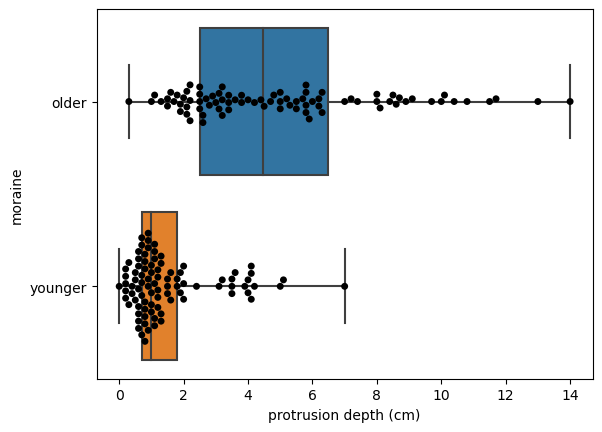

In [10]:
sns.boxplot(x="protrusion depth (cm)", y="moraine", data=diorite_protrusions,whis=[0,100])
sns.swarmplot(x="protrusion depth (cm)", y="moraine", data=diorite_protrusions,color="black")
plt.show()

### Histograms

Alternatively, we could plot histograms of the data:

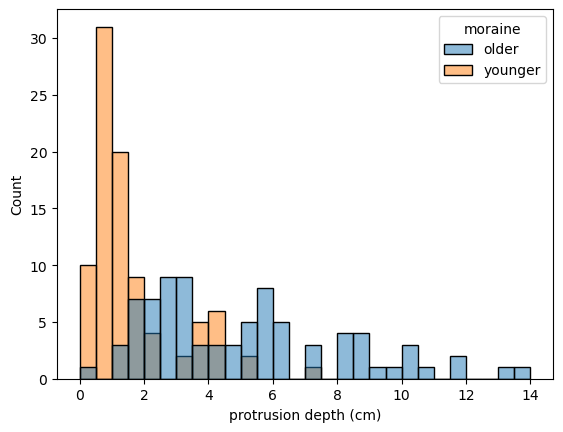

In [11]:
sns.histplot(data=diorite_protrusions, x="protrusion depth (cm)", hue="moraine", binwidth=0.5)
plt.show()

### Kernel Density Function Visualization

Or visualize the data using a kernel density function. kdeplots display information in a similar way than histograms, though a Gaussian kernel is used to produce a smoothed line corresponding to observations count:

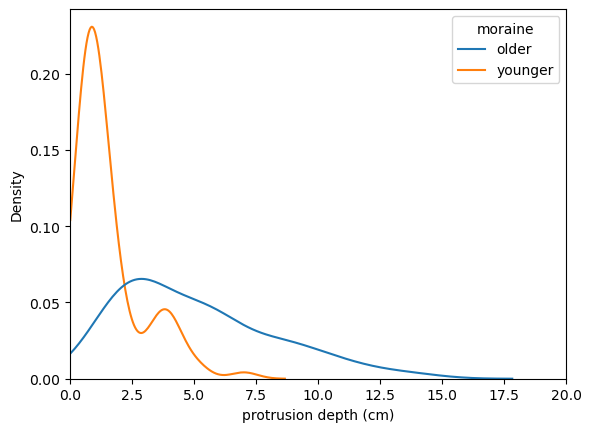

In [12]:
sns.kdeplot(data=diorite_protrusions, x="protrusion depth (cm)", hue="moraine",
            clip=(0, None))
plt.xlim(0,20)
plt.show()

### Empirical Cumulative Distribution Plot

Visualize the data using an empirical cumulative distribution function (ECDF). ECDF plots show the proportion of observations less than or equal to a particular value which provide an effective way to compare two distributions.

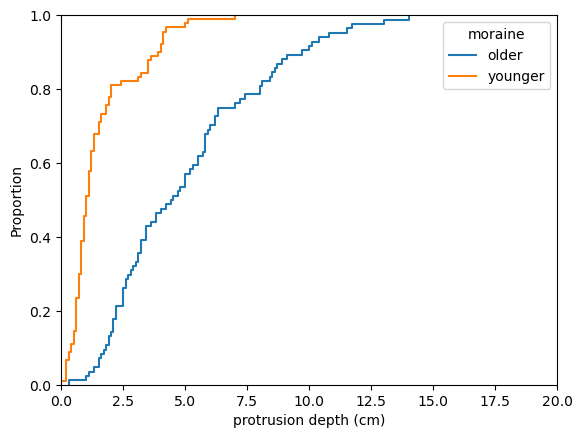

In [13]:
sns.ecdfplot(data=diorite_protrusions, x="protrusion depth (cm)", hue="moraine")
plt.xlim(0,20)
plt.show()

## Evaluate distributions using the Kolmogorov-Smirnov (K-S) test

We can evaluate the null hypothesis that the distributions are the same using the Kolmogorov-Smirnov (K-S) test. The alternative hypothesis is that the two samples come from different distributions. The test returns two values:

- **K-S Statistic**: Indicates the maximum difference between the ECDFs. A higher value suggests a greater difference between the distributions.
- **P-value**: Assesses the statistical significance of the observed difference. A low p-value (typically < 0.05) indicates that the difference between the distributions is statistically significant and unlikely to have occurred by chance.

Usually the way the test is assessed is:
- If P-value < α (significance level, typically 0.05): Reject the null hypothesis, indicating a significant difference between the distributions.
- If P-value ≥ α: Fail to reject the null hypothesis, indicating insufficient evidence to conclude a significant difference between the distributions.

In [14]:
diorite_young_depth = diorite_protrusions[diorite_protrusions['moraine'] == 'younger']['protrusion depth (cm)']
diorite_old_depth = diorite_protrusions[diorite_protrusions['moraine'] == 'older']['protrusion depth (cm)']

# Perform the K-S test
ks_stat, p_value = ks_2samp(diorite_young_depth, diorite_old_depth)
print(f"K-S statistic: {ks_stat:.2f}")
print(f"P-value: {p_value:.2e}")

K-S statistic: 0.55
P-value: 1.81e-15


## Your turn!

Guided by the code examples above, visualize the clast count data. It is of interest to compare clast sizes between the two moraines. Using the 'x' dimension could be a way to do this. In the code below where we import the data, we make sure that the x dimension is the largest dimension.

You can also create other visualizations such as the relative proportion of igneous vs. metasedimentary clasts.

In [16]:
sheet_id = '1AzWK9z--mBC0JONk-sZ0wTZwc83oNqbGtiug3i1qsG0'
sheet_name = 'clast_counts'
clasts_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [17]:
combined_clasts = pd.read_csv(clasts_url)
combined_clasts

for n in combined_clasts.index:
    if combined_clasts['x (cm)'][n]<combined_clasts['y (cm)'][n]:
        combined_clasts['x (cm)'][n] = combined_clasts['y (cm)'][n]
        combined_clasts['y (cm)'][n] = combined_clasts['x (cm)'][n]
combined_clasts

,team name,moraine,clast #,x (cm),y (cm),z (cm),lithology,lithology detail,weathering notes,protrusion (yes/no),...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Leah,older,1,193.0,191.0,26.0,igneous,granodiorite,exfoliation weathering,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Leah,older,2,0.2,0.2,0.1,igneous,granodiorite,subangular,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Leah,older,3,0.4,0.2,0.2,igneous,granodiorite,angular,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Leah,older,4,0.9,0.6,0.3,metasedimentary,very fine quartzite,angular,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Leah,older,5,12.0,4.5,2.0,metasedimentary,slate,dark with red-brown oxidation,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Fault,younger,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Fault,younger,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Fault,younger,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Fault,younger,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
